In [1]:
# import needed libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# define model
def bistability (y0, t, parameters):
    # variable
    A_star = y0

    # parameters (dictionary)
    stimulus = parameters['stimulus']
    A_tot = parameters['A_tot']
    f = parameters['f']
    K = parameters['K']
    n = parameters['n']
    d = parameters['d']

    # terms 
    production = stimulus*(A_tot - A_star)
    PFL  = (A_tot - A_star) * f * (A_star**n) / (K**n + A_star**n) 
    degradation = d * A_star

    # ODE
    dAstar_dt = production + PFL - degradation
    return dAstar_dt 

the steady state of x is: 0.7332325924035006


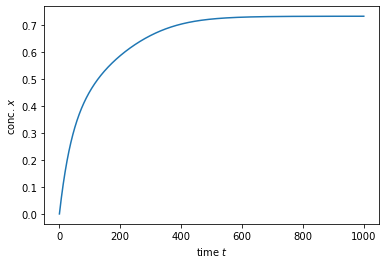

In [12]:
# time, initial conditions and parameters needed for integration
t = np.arange(0, 1000, 0.1)
y0 = 0
parameters = {'stimulus':0.01, 'A_tot':1, 'f':0.10, 'K':1, 'n':5, 'd':0.01 }

sol = odeint(bistability, y0, t, args=(parameters,))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, sol),
ax.set_xlabel('time $t$')
ax.set_ylabel('conc. $x$')

x_SS = sol[-1, 0]
print('the steady state of x is: {}'.format(x_SS, '.2f'))

(0, 1)

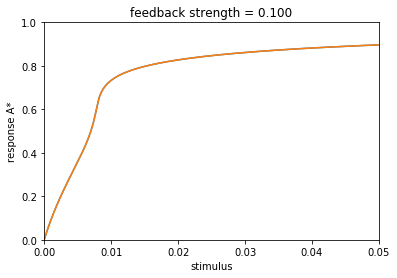

In [13]:
# stimulus-response(A*) curve for f=0.10
# --------------------------------------
# what we do is record what is the steady state value of the system for changing values of stimulus
# more precisely:
# 1. we change the stimulus parameter from smaller to larger value
# 2. Find the new steady state for that change of parameter and store it
# 3. Iterate and start point 1 again
stimulus = np.arange(0, 0.05, .00001)

list_steady_states = []
for s in stimulus:
    parameters['stimulus'] = s
    sol = odeint(bistability, y0, t, args=(parameters,))
    SS = sol[-1] #steady state is the last value of our solution
    y0 = SS #in next iteration the SS will be used as initial condition
    list_steady_states.append(SS)

# now we do the same but in the reversed order: from LARGER to SMALLER value of stimulus, to see if the value of SS depends on where we come from ('memory')
stimulus_rev = stimulus[::-1]

list_steady_states_rev = []
for s in stimulus_rev:
    parameters['stimulus'] = s
    sol = odeint(bistability, y0, t, args=(parameters,))
    SS = sol[-1] #steady state is the last value of our solution
    y0 = SS #in next iteration the SS will be used as initial condition
    list_steady_states_rev.append(SS)

# plot our signal-response (i.e., stimulus-A*) curve
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(stimulus, list_steady_states)
ax1.plot(stimulus, list_steady_states_rev[::-1])
ax1.set_xlabel('stimulus')
ax1.set_ylabel('response A*')
ax1.set_title('feedback strength = {}'.format(format(parameters['f'], '.2f')))
ax1.set_xlim([0, 0.05]); ax1.set_ylim([0, 1])

(0, 1)

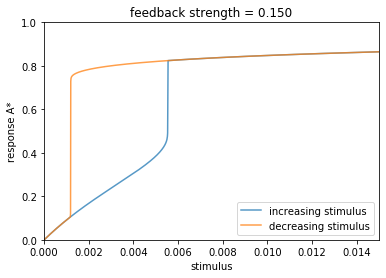

In [14]:
# Now let's find out what HYSTERESIS is by changing the feedback strength to f=0.15
parameters['f'] = 0.15
y0 = 0
stimulus = np.arange(0, 0.025, .00001)

list_steady_states = []
for s in stimulus:
    parameters['stimulus'] = s
    sol = odeint(bistability, y0, t, args=(parameters,))
    SS = sol[-1] #steady state is the last value of our solution
    y0 = SS #in next iteration the SS will be used as initial condition
    list_steady_states.append(SS)

# now we do the same but in the reversed order to see if the value of SS depends on where we come from ('memory')
stimulus_rev = stimulus[::-1]

list_steady_states_rev = []
for s in stimulus_rev:
    parameters['stimulus'] = s
    sol = odeint(bistability, y0, t, args=(parameters,))
    SS = sol[-1] #steady state is the last value of our solution
    y0 = SS #in next iteration the SS will be used as initial condition
    list_steady_states_rev.append(SS)

# plot our signal-response (i.e., stimulus-A*) curve
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(stimulus, list_steady_states, label='increasing stimulus', alpha=0.75)
ax2.plot(stimulus, list_steady_states_rev[::-1], label='decreasing stimulus', alpha=0.75)
ax2.legend()
ax2.set_xlabel('stimulus')
ax2.set_ylabel('response A*')
ax2.set_title('feedback strength = {}'.format(format(parameters['f'], '.2f')))
ax2.set_xlim([0, 0.015]); ax2.set_ylim([0, 1])

(0, 1)

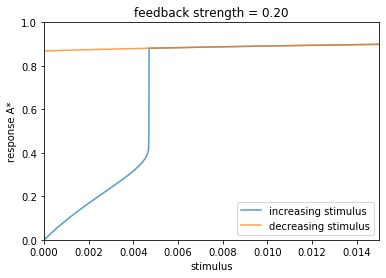

In [15]:
# For even higher values of feedback strength f we can make the switch irreversible 
parameters['f'] = 0.20
y0 = 0
stimulus = np.arange(0, 0.025, .00001)

list_steady_states = []
for s in stimulus:
    parameters['stimulus'] = s
    sol = odeint(bistability, y0, t, args=(parameters,))
    SS = sol[-1] #steady state is the last value of our solution
    y0 = SS #in next iteration the SS will be used as initial condition
    list_steady_states.append(SS)

# now we do the same but in the reversed order to see if the value of SS depends on where we come from ('memory')
stimulus_rev = stimulus[::-1]

list_steady_states_rev = []
for s in stimulus_rev:
    parameters['stimulus'] = s
    sol = odeint(bistability, y0, t, args=(parameters,))
    SS = sol[-1] #steady state is the last value of our solution
    y0 = SS #in next iteration the SS will be used as initial condition
    list_steady_states_rev.append(SS)

# plot our signal-response (i.e., stimulus-A*) curve
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.plot(stimulus, list_steady_states, label='increasing stimulus', alpha=0.75)
ax3.plot(stimulus, list_steady_states_rev[::-1], label='decreasing stimulus', alpha=0.75)
ax3.legend()
ax3.set_xlabel('stimulus')
ax3.set_ylabel('response A*')
ax3.set_title('feedback strength = {}'.format(format(parameters['f'], '.2f')))
ax3.set_xlim([0, 0.015]); ax3.set_ylim([0, 1])